<div class="alert alert-info">
    <b>Комментарий студента:</b> Алексей, привет! Спасибо за ревью, ты классный! Доработала по твоим комментариям, спасибо за замечания - все по делу! Возникло еще пара вопросов - посмотри, пожалуйста (как обычно, синим цветом).
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Спасибо, что доделала работу, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Юля!</b>

Меня зовут Алексей Косенко, и я буду проверять твой проект.
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

# Анализ оттока клиентов сети фитнес-центров «Культурист-датасаентист»

Необходимо провести анализ оттока клиентов сети фитнес-центров «Культурист-датасаентист» и подготовить план действий по удержанию клиентов.<br> 
Задачи:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - выделить целевые группы клиентов;
    - предложить меры по снижению оттока;
    - определить другие особенности взаимодействия с клиентами.

В csv-файлах подготовлены данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

`gender` — пол;<br>
`Near_Location` — проживание или работа в районе, где находится фитнес-центр;<br>
`Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);<br>
`Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);<br>
`Phone` — наличие контактного телефона;<br>
`Age` — возраст;<br>
`Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).<br><br>

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:<br>
`Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);<br>
`Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);<br>
`Group_visits` — факт посещения групповых занятий;<br>
`Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;<br>
`Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;<br>
`Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.<br><br>
`Churn` — факт оттока в текущем месяце.<br>

## Загрузка данных

In [1]:
#!pip install --upgrade matplotlib

In [2]:
# from platform import python_version
# print(python_version())

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.model_selection import train_test_split # разбивка на train и test выборки
from sklearn.preprocessing import StandardScaler # стандартизатор
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
# import matplotlib
# print('matplotlib: {}'.format(matplotlib.__version__))

In [5]:
pd.set_option('display.float_format', '{:,.3f}'.format) # задать формат для float (3 знака после запятой)
pd.set_option('display.max_columns', None) # показать все столбцы в таблице

In [6]:
path = 'D:\ЮЮ\ОБУЧЕНИЕ ГЛАВНОЕ\Яндекс Практикум Аналитик данных\ML\Самостоятельный проект'

In [7]:
try:
    df = pd.read_csv(path + '\gym_churn.csv')
except: 
    df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

In [8]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: данные на месте, можно переходить к анализу</div>

## Исследовательский анализ данных

### Пропуски, средние, стандартные отклонения

Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения.

In [9]:
# смотрим размер таблицы
df.shape

(4000, 14)

In [10]:
# смотрим наличие пропусков и типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [11]:
df.columns = [i.lower() for i in df.columns]
# df.columns = df.columns.str.lower()

In [12]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [13]:
# преобразуем формат float в более подходящий для количества месяцев - int
df['month_to_end_contract'] = df['month_to_end_contract'].astype(int)

In [14]:
## еще раз проверим пропуски
df.isnull().sum()
# df.isna().mean()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [15]:
# проверка дубликатов
df.duplicated().sum()

0

In [16]:
# посомтрим средние значения и стандартные отклонения
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.000",0.510,0.500,0.000,0.000,1.000,1.000,1.000
near_location,"4,000.000",0.845,0.362,0.000,1.000,1.000,1.000,1.000
partner,"4,000.000",0.487,0.500,0.000,0.000,0.000,1.000,1.000
promo_friends,"4,000.000",0.308,0.462,0.000,0.000,0.000,1.000,1.000
phone,"4,000.000",0.903,0.295,0.000,1.000,1.000,1.000,1.000
contract_period,"4,000.000",4.681,4.550,1.000,1.000,1.000,6.000,12.000
group_visits,"4,000.000",0.412,0.492,0.000,0.000,0.000,1.000,1.000
age,"4,000.000",29.184,3.258,18.000,27.000,29.000,31.000,41.000
avg_additional_charges_total,"4,000.000",146.944,96.356,0.148,68.869,136.220,210.950,552.591
month_to_end_contract,"4,000.000",4.323,4.191,1.000,1.000,1.000,6.000,12.000


Данные подготовлены для дальнейшего анализа:
- названия столбцов приведены к нижнему регистру для единообразия стиля;
- тип данных для столбца "Срок до окончания текущего действующего абонемента (в месяцах)" (`Month_to_end_contract`) заменен с float на более подходящий - integer;
- пропуски не обнаружены;
- дубликаты не обнаружены;
- получены первичные данные по средним значениям и стандартным отклонениям для дальнейшего исследования.


Портрерт среднестатестического клиента фтнес-центра:
- мужчины и женщины в равной степени;
- проживающие или работающие рядом с финтер-центром;
- половина из них работают в компаниях-партнерах фитнес-центра;
- большинство приходят самостоятельно, без промокодов в рамках акции "приведи друга";
- оставляют номера телефонов;
- средняя продолжительность абонементов 4-5 месяцев;
- посещают групповые занятия - 41%;
- средний возраст - 29 лет;
- средние траты на дополнительные услуги финтес-центра - 147;
- средняя продолжительность посещения фитнес-центра - 3-4 месяца т.е. можно сказать, что большинство клиентов перестает посещать клуб за 1 месяц до истечения срока своего абонемента;
- посещают фитнес 1-2 раза в неделю.

Дополнительно необходимо обратить внимание на то, что оттоку подвержены 26% пользователей. Неоднородность между долей ушедших и оставшихся может негативно сказаться на точности дальнейших прогнозов, при использовании некоторых алгоритмов дмашинного обучения.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все верно, чистые данные, повезло :)</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: можно вкратце описать особенности среднего клиента: возраст, близость к фитнес-центру и т.д.</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: еще стоит обратить внимание на дисбаланс классов в целевом признаке(`Churn`), это может быть важно при обучении модели</div>

    
<div class="alert alert-info">
    <b>Комментарий:</b> спасибо за советы! Выще добавила портрет среднего клиента и комментарий по поводу дисбаланса классов.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

### Средние значения признаков (ушел/остался)

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [17]:
# смотрим на средние значения признаков в двух группах — 
# тех, кто ушел в отток - 1 и тех, кто остался - 0
df_mean = df.groupby('churn').mean().T
df_mean.columns = ['Остался', 'Ушел']
#df_mean['Разница, %'] = 1 - df_mean['Остался']/df_mean['Ушел']
df_mean['Разница, %'] = 1 - df_mean['Ушел']/df_mean['Остался']
#df_mean
display((df_mean.sort_values(by = 'Разница, %', ascending=False)).style.format({'Разница, %':"{0:.0%}"}))

,Остался,Ушел,"Разница, %"
lifetime,4.711807,0.990575,79%
contract_period,5.747193,1.728558,70%
month_to_end_contract,5.283089,1.662582,69%
avg_class_frequency_current_month,2.027882,1.044546,48%
promo_friends,0.353522,0.183789,48%
group_visits,0.464103,0.268615,42%
partner,0.534195,0.355325,33%
avg_additional_charges_total,158.445715,115.082899,27%
avg_class_frequency_total,2.024876,1.474995,27%
near_location,0.873086,0.768143,12%


Ушедшие клиенты отличаются от среднестатестических:
- их лайфтайм значительно меньше и составляет 1 месяц (среднестатестический - 3-4 месяца);
- средняя продолжительность абонементов - 1-2 месяца (среднестатестический - 4-5 месяцев);
- посещают фитнес 1-раз в неделю (среднестатестический - 1-2 раза);
- 18% приходят в рамках акции "приведи друга" (среднестатестический - 30%);
- посещают групповые занятия - 27% (среднестатестический - 41%);
- только 35% работают в компаниях-партнерах фитнес-центра (среднестатестический - 49%);
- средние траты на дополнительные услуги финтес-центра - 115 (среднестатестический - 147);
- посещают фитнес скорее 1 раз в неделю (среднестатестический - скорее 2 раза);
- возраст - 27 лет (среднестатестический - 29 лет).

Как и среднестатестичекие клиенты, большинство ушедших:
- проживают или работают рядом с финтер-центром;
- оставляют номера телефонов;
- мужчины и женщины т.е. отсутствует дифференциация по полу.


<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: тут тоже было бы неплохо зафиксировать основные отличия в выводе, судя по этой таблице</div>

    
<div class="alert alert-info">
    <b>Комментарий:</b> спасибо! Добавила отличия.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все верно!</div>

### Распределение признаков (ушел/остался)

Построим столбчатые диаграммы и гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

<div class="alert alert-block alert-info"><b>Комментарий и вопросы ревьюеру:</b><br>
В задании было сказано: <cite>Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)</cite>.<br>
    
1) Не совсем понятно, что имелось в виду под "столбчатые гистограммы" - столбчаты диаграммы или гистограммы? <br>
Т.к. речь идет о "распределения признаков", видимо нужно было все-таки гистограммы? <br>
2) Если говорить о не столбчатых гистограммах - это какие? Сглаженные?<br>

3) Ниже строю и столбчатые диаграммы и гистограммы - для понятности и различного сравнения. <br>
Гистограммы ниже строю с помощью пандовского hist() - это допустимо? Более продвинутый displot() буду строить в конце исследования. Есть ли какая-то принципиальность в использовании того или иного способа построения гистограммы?
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: Здорово, что внимательно читаешь задание! Попробую ответить на твои вопросы:
    
1. Главное отличие между столбчатой диаграммой и гистограммой в том, что первая используется для визуализации категориальных признаков, а вторая — для непререрывных. Но по сути, гистограмма — это один из видов столбчатых диаграмм, поэтому часто в статьях, книгах и других материалах можно встретить всевозможные комбинации этого названия, можно особо не обращать внимания, речь обычно об одном и том же. Но если говорить в этих терминах, то всегда непрерывные численные признаки визуализируют именно гистограммой, чтобы было видно распределение признака
2. Честно говоря, никогда не слышал о не столбчатых гистограммах :) Ведь столбцы несут довольно точный смысл — это прямоугольники, площади которых пропорциональны частоте выбранных интервалов(корзин), без них гистограмма уже не совсем гистограмма.
3. Принципиального различия в способах нет, библиотека seaborn активно использует методы библиотеки matplotlib, поэтому функционал у них, как правило, схожий

</div>

    
<div class="alert alert-info">
    <b>Комментарий:</b> спасибо за развернутый комментарий!
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

#### Столбчатые диаграммы

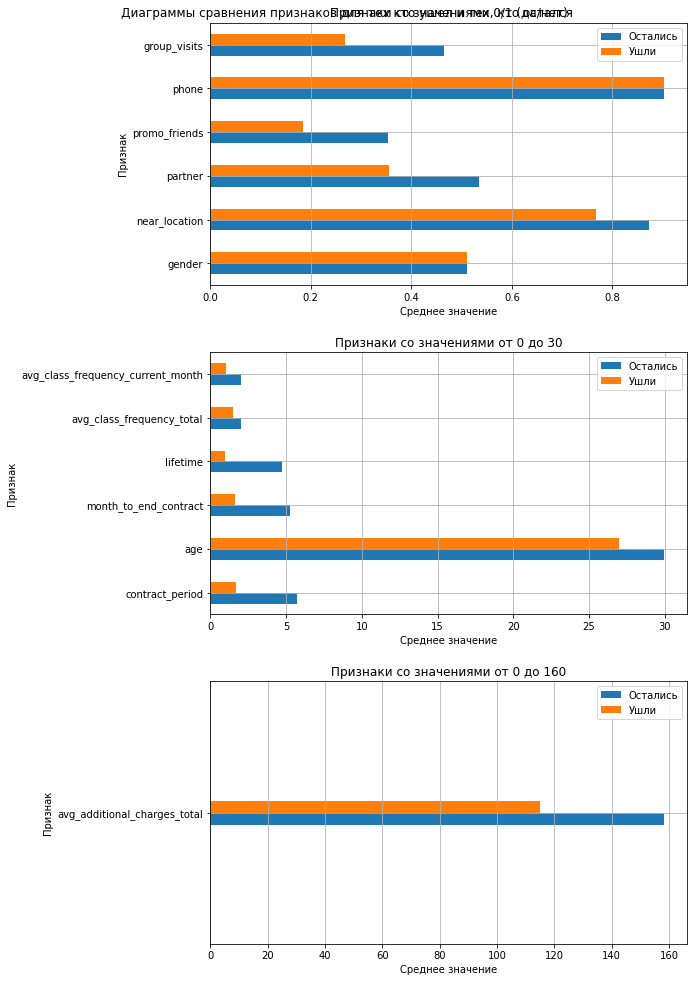

In [18]:
# Графики
# разделим графики на 3 части в зависимости от масштаба, чтобы не терялись маленьки значения 0/1
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,14))
#fig, axs = plt.subplots(3, 51, figsize=(8, 5), constrained_layout=True, sharex=True, sharey=True)


# отбираем столбцы и строим столбчатые диаграммы
(df_mean.loc[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits'],:]
       .plot(kind='barh',
             grid=True,
             ax=ax[0],
             title='Признаки со значениями 0/1 (да/нет)',
             y=[0, 1],
             label=['Остались', 'Ушли'],
             #xlabel = 'Среднее значение',
             #ylabel = 'Признак'
            )
      )


(df_mean.loc[['contract_period', 'age', 'month_to_end_contract', 
                    'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'],:]
       .plot(kind='barh', 
             grid=True, 
             ax=ax[1],
             title='Признаки со значениями от 0 до 30',
             y=[0, 1],
             label=['Остались', 'Ушли'],
             #xlabel = 'Среднее значение',
             #ylabel = 'Признак'
            )
      )


(df_mean.loc[['avg_additional_charges_total'],:]
       .plot(kind='barh', 
             grid=True, 
             ax=ax[2], 
             width=0.05, # ширина столбцов 
             title='Признаки со значениями от 0 до 160',
             y=[0, 1],
             label=['Остались', 'Ушли'],
             #xlabel = 'Среднее значение',
             #ylabel = 'Признак'
            )
      )

ax[0].set_xlabel('Среднее значение')
ax[0].set_ylabel('Признак')
ax[1].set_xlabel('Среднее значение')
ax[1].set_ylabel('Признак')
ax[2].set_xlabel('Среднее значение')
ax[2].set_ylabel('Признак')
#fig.supxlabel('Среднее значение')
#fig.supylabel('Признак')
ax[0].yaxis.set_tick_params(rotation=0) # поворот подписей оси y

#plt.figtext(.5,.9,'Диаграммы сравнения признаков для тех кто ушел и тех, кто остался', ha='center')
fig.tight_layout(pad=2) # отсутп между suptitle и title графика
fig.suptitle('Диаграммы сравнения признаков для тех кто ушел и тех, кто остался', horizontalalignment='center')
plt.show;

#### Гистограммы

In [19]:
# функция построения гистограмм распределения признаков для оттока и оставшихся
def col_hist(columns):
    for i in df.columns:
        print('Распределение признака -', i)
        plt.hist(df[df['churn'] == 0][i], color='Lightblue', alpha=0.75, bins=20)
        plt.hist(df[df['churn'] == 1][i], color='Orange', alpha=0.75, bins=20)
        plt.xlabel('Значение')
        plt.ylabel('Количество наблюдений')
        #plt.text()
        #plt.legend(['not_churn', 'churn'])
        plt.legend(['Остались', 'Ушли'])
        plt.grid(True)
        #df[df['churn'] == 0][i].hist()
        #df[df['churn'] == 1][i].hist()
        plt.show()

Распределение признака - gender


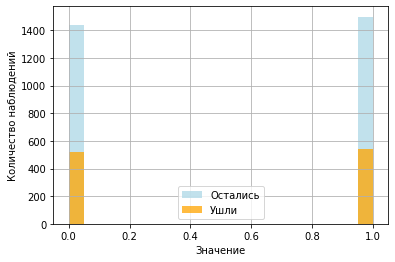

Распределение признака - near_location


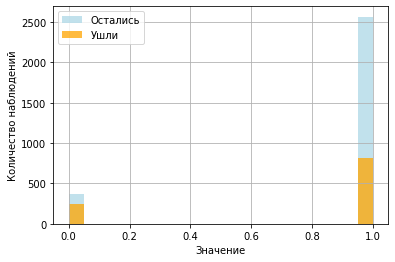

Распределение признака - partner


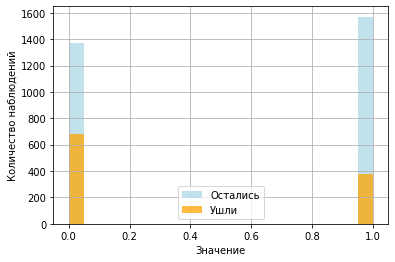

Распределение признака - promo_friends


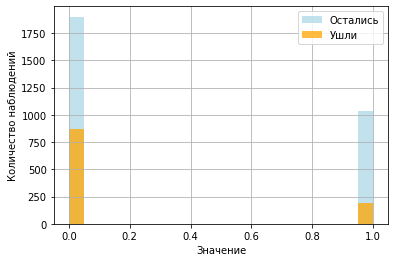

Распределение признака - phone


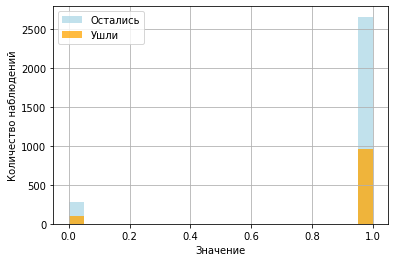

Распределение признака - contract_period


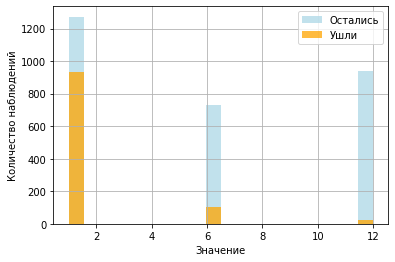

Распределение признака - group_visits


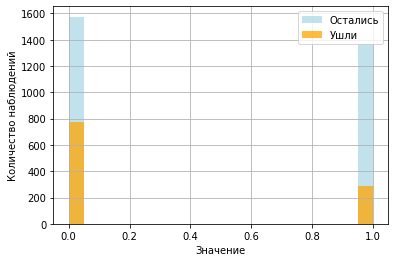

Распределение признака - age


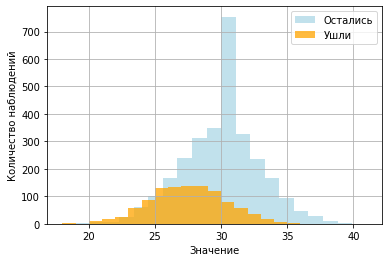

Распределение признака - avg_additional_charges_total


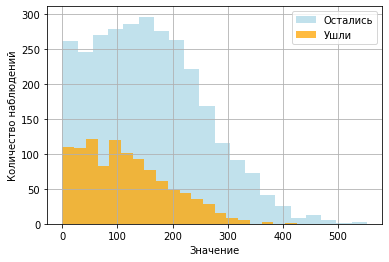

Распределение признака - month_to_end_contract


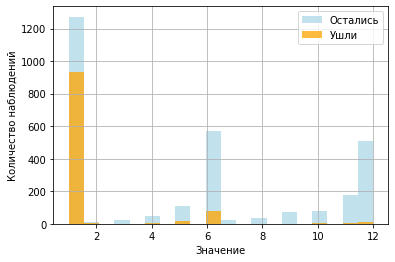

Распределение признака - lifetime


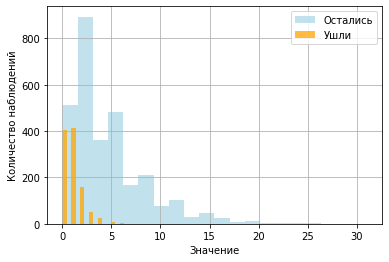

Распределение признака - avg_class_frequency_total


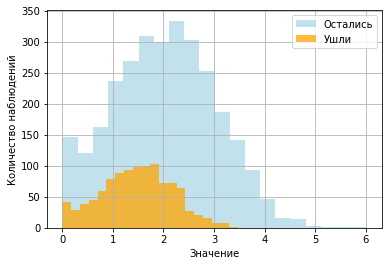

Распределение признака - avg_class_frequency_current_month


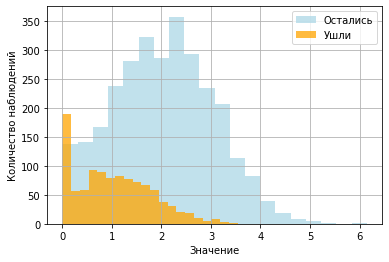

Распределение признака - churn


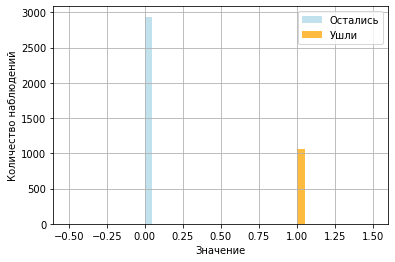

In [20]:
# строим попарные (отток/не отток) гистограммы распределения признаков
col_hist(df.columns)

Графики демонстрируют различия по признакам для тех кто ушел тех, кто остался. Наиболее значимыми признаками, влияющие на отток являются:
- `lifetime` - время с момента первого обращения в фитнес-центр (в месяцах) - если оно меньше 1 месяца;
- `contract_period` - длительность текущего действующего абонемента (месяц, 6 месяцев, год) - если оно меньше 2-х месяцев;
- `month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах) - если он меньше 2-х месяцев;
- `avg_class_frequency_current_month` и `avg_class_frequency_total` - средняя частота посещений в неделю за все время с начала действия абонемента или за предыдущий месяц - если она меньше 2-х раз в неделю;
- `age` - более молодой возраст - моложе 27.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: и столбчатые диаграммы, и гистограммы у тебя получились очень наглядными :)</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: но вот пояснений тут тоже не хватает, выводы к графикам нужны всегда</div>

<div class="alert alert-info">
    <b>Комментарий:</b> Выводы для графиков сответствуют выводам в конце подраздела. Дублировать выводы и писать масло-масленное или одно и то же , но разными словами как-то не очень хотелось. Поэтому решила выводы перенести именно в конец подраздела. Как добавить выводы под графики без дублирования выводов подраздела - пока не знаю. Добавила кое-что под графики, пока так. <br>
    А как обычно поступают если выводы под таблицами/графиками по сути дублируют общий вывод подраздела?
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: лучше оставлять выводы там, где ты к ним приходишь, они, по сути, более приоритетны. А в конце раздела можно просто кратко резюмировать, так твой проект будет удобнее читать. Я бы ориентировался на популярные тетрадки на kaggle(<a href="https://www.kaggle.com/code/niharika41298/netflix-visualizations-recommendation-eda" target="blank_">пример</a>), они часто интересные и хорошо оформлены.

Ну а если выводы будут дублироваться — это не так страшно, зато если кто-то захочет пролистать твою работу, ему не придется ее изучать подробно, достаточно будет прочитать выводы
</div>

### Матрица корреляций

Построим матрицу корреляций, чтобы посмотреть зависимости между признаками.

In [21]:
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000,0.007,-0.010,-0.005,-0.009,0.001,0.018,0.014,-0.009,-0.001,0.014,0.015,0.009,0.001
near_location,0.007,1.000,-0.005,0.211,-0.016,0.150,0.155,0.058,0.041,0.144,0.071,0.043,0.063,-0.128
partner,-0.010,-0.005,1.000,0.452,0.010,0.306,0.023,0.047,0.023,0.295,0.061,0.025,0.046,-0.158
promo_friends,-0.005,0.211,0.452,1.000,0.002,0.245,0.120,0.050,0.037,0.240,0.073,0.028,0.054,-0.162
phone,-0.009,-0.016,0.010,0.002,1.000,-0.007,-0.010,-0.011,0.009,-0.011,-0.019,0.008,0.013,-0.001
contract_period,0.001,0.150,0.306,0.245,-0.007,1.000,0.170,0.138,0.111,0.973,0.171,0.096,0.159,-0.390
group_visits,0.018,0.155,0.023,0.120,-0.010,0.170,1.000,0.081,0.032,0.164,0.076,0.057,0.076,-0.175
age,0.014,0.058,0.047,0.050,-0.011,0.138,0.081,1.000,0.080,0.135,0.165,0.120,0.183,-0.405
avg_additional_charges_total,-0.009,0.041,0.023,0.037,0.009,0.111,0.032,0.080,1.000,0.114,0.079,0.044,0.080,-0.199
month_to_end_contract,-0.001,0.144,0.295,0.240,-0.011,0.973,0.164,0.135,0.114,1.000,0.161,0.085,0.148,-0.381


Тепловая карта корреляции признаков


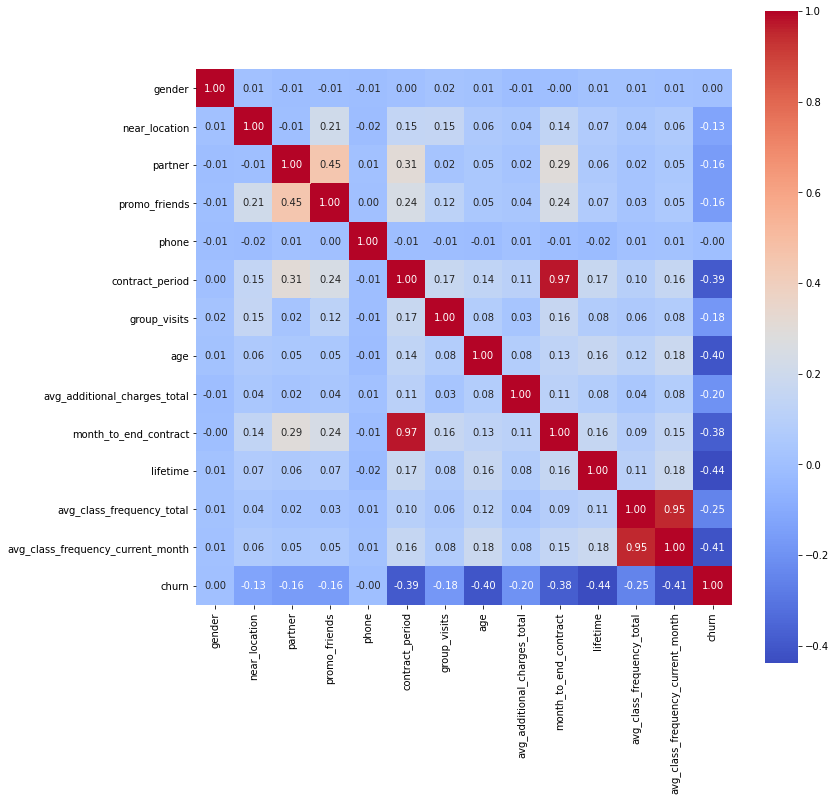

In [22]:
print('Тепловая карта корреляции признаков')
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Наиболее скорреллированными признаками являются "Средняя частота посещений в неделю за все время" (`avg_class_frequency_total`) и "Средняя частота посещений в неделю за предыдущий месяц" (`avg_class_frequency_current_month`), что вполне логично так как это два близких по смыслу признака. А также "Длительность текущего абонемента" (`contract_period`) и "Срок до окончания текущего абонемента" (`month_to_end_contract`). Для остальных признаков значимая корреляция не наблюдается. 

### Выводы

По предварительным наблюдениям, основанным на сравнении признаков для тех кто ушел и тех, кто остался:
- значимыми признаками, влияющие на отток являются:
    - `lifetime` - время с момента первого обращения в фитнес-центр (в месяцах) - если оно меньше 1 месяца;
    - `contract_period` - длительность текущего действующего абонемента (месяц, 6 месяцев, год) - если оно меньше 2-х месяцев;
    - `month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах) - если он меньше 2-х месяцев;
    - `avg_class_frequency_current_month` и `avg_class_frequency_total` - средняя частота посещений в неделю за все время с начала действия абонемента или за предыдущий месяц - если она меньше 2-х раз в неделю;
    - `age` - более молодой возраст - моложе 27;
- положительно на удержание клиентов влияют:
    - `promo_friends` - факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - `group_visits` - посещения групповых занятий;
    - `partner` - сотрудничество компании клиента с клубом (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- не имеют значения:
    - `near_location` - проживание или работа в районе, где находится фитнес-центр;
    - `phone` - наличие контактного телефона;
    - `gender` - пол.
    

Наиболее скорреллированными признаками являются "Средняя частота посещений в неделю за все время" (`avg_class_frequency_total`) и "Средняя частота посещений в неделю за предыдущий месяц" (`avg_class_frequency_current_month`), что вполне логично так как это два близких по смыслу признака. А также "Длительность текущего абонемента" (`contract_period`) и "Срок до окончания текущего абонемента" (`month_to_end_contract`). Для остальных признаков значимая корреляция не наблюдается. 

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

## Модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

### Обучающая и валидационная выборки

In [23]:
X = df.drop('churn', axis=1)
y = df['churn']

In [24]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: с размерами выборок все окей :)</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: так как в целевом признаке есть дисбаланс, то выборки лучше стратифицировать с помощью параметра **stratify** в train_test_split. Так у тебя точно не возникнет ситуации, когда, например, в тестовой выборке соотношение классов будет сильно отличаться от соотношения в обучающей выборке

Подробнее про стратификацию:
* https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn
* https://code.likeagirl.io/good-train-test-split-an-approach-to-better-accuracy-91427584b614    
* https://habr.com/ru/post/496750/
* https://habr.com/ru/company/X5Group/blog/596279/
</div>

<div class="alert alert-info">
    <b>Комментарий:</b> Добавила `stratify=y`. Странно, что об этом ничего не говорилось в теории, думала train_test_split() сам по себе подразумевает правильную стратификацию и прочее.<br> 

1) Спасибо за ссылки! Пробежалась по ним, но не очень вникла (особенно в последние 2). <br> 
Если churn составляет 26% от всех клиентов в таблице, а в test мы отбираем 20% клиентов, то **какая доля churn в итоге попадет в test-выборку**? 13% (половина от 26%) или 5,2% т.е. нужная пропорция для 20% клиентов от 26% churn из всей выборки?  <br>  <br> 

    
2) Мы стратифицируем только y т.е. целевую переменную. А остальные признаки не надо аналогично стратифицировать - возраст, промо от друга, пол и т.д.? Не получится так, что в train , например, вообще не будет женщин (женщин всего 50% и из них 20% полностью уйдут в выборку test (вместо 10% м и 10% ж)? 
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: многие инструменты и правда изначально подразумевают стратификацию, но для train_test_split это не подходит, ведь этот же метод используется при разделении выборок для решения задачи регрессии, а там стратификация неактуальна. Но использовать ее крайне просто, поэтому это не проблема. А по поводу вопросов:
    
1) Последние две ссылки больше не для использования, а для понимания с математической точки зрения, что такое стратификация. Не понимать их — это нормально :) Но на этом этапе это точно не обязательно, только интереса ради

А в тестовую выборку попадет примерно 5.2% клиентов, можешь сама в этом убедиться, использовав метод value_counts(normalize=True) на тестовой выборке
    
2) Нет, остальные признаки стратифицировать не нужно, более того, это может быть даже вредно, модель будет переобучаться. Чисто теоретически, шанс, что в одну из выборок вообще не попадут значения каких-то признаков есть, но он крайне мал. Да и будет достаточно просто поменять значение random_state, чтобы выборки разбились по-другому

</div>

In [25]:
# стандартизируем данные
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) # обучаем и стандартизируем обучающую выборку
X_test_st = scaler.transform(X_test) # стандартизируем тестовую выборку

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: хорошо, что ты обучаешь StandardScaler только на обучающей выборке, так можно избежать утечки данных</div>

### Обучение модели на train-выборке

Для обучения модели с помощью LogisticRegression и RandomForestClassifier сохраняем все признаки, в том числе коррелирующие друг с другом:
- "Средняя частота посещений в неделю за все время" (`avg_class_frequency_total`) и "Средняя частота посещений в неделю за предыдущий месяц" (`avg_class_frequency_current_month`), 
- "Длительность текущего абонемента" (`contract_period`) и "Срок до окончания текущего абонемента" (`month_to_end_contract`)

так как логарифмическая регрессия по умолчанию использует регуляризацию, а деревья устойчивы к мультиколлинеарности. 

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все верно, здорово, что ты это знаешь :)</div>

In [26]:
# обучаем и делаем прогноз с помощью Логистической регрессии
model_lr = LogisticRegression(random_state=0, solver='liblinear')
model_lr.fit(X_train_st, y_train)
y_pred_lr = model_lr.predict(X_test_st)
#y_probas = model_lr.predict_proba(X_test_st)[:,1]

In [27]:
# обучаем и делаем прогноз с помощью Случайного леса
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train_st, y_train)
y_pred_rf = model_rf.predict(X_test_st)

### Оценка метрик

In [28]:
# оценим метрики accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

# оценим метрики precision
precision_lr = precision_score(y_test, y_pred_lr)
precision_rf = precision_score(y_test, y_pred_rf)

# оценим метрики recall
recall_lr = recall_score(y_test, y_pred_lr)
recall_rf = recall_score(y_test, y_pred_rf)

In [29]:
print('Сравнение метрик для моделей на валидационной выборке')
df_model = pd.DataFrame({
    'Metrics': ['accuracy', 'precision', 'recall'],
    'LogisticRegression': [acc_lr, precision_lr, recall_lr], 
    'RandomForestClassifier': [acc_rf, precision_rf, recall_rf]
})
df_model

Сравнение метрик для моделей на валидационной выборке


,Metrics,LogisticRegression,RandomForestClassifier
0,accuracy,0.935,0.922
1,precision,0.896,0.875
2,recall,0.854,0.825


Модель LogisticRegression показала себя лучше модели RandomForestClassifier на основании метрик accuracy, precision и recall так как значения ее метрик оказались ближе к 1.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, логистическая регрессия справилась весьма недурно</div>

## Кластеризация клиентов

Проведем кластеризацию объектов (клиентов).

### Стандартизация данных

In [30]:
# обязательная стандартизация данных перед работой с алгоритмами кластеризации
sc = StandardScaler() # создаём объект класса scaler (нормализатор)
X_sc = sc.fit_transform(df.drop('churn', axis=1)) # обучаем нормализатор и преобразуем набор данных 
X_sc[:5]

array([[ 0.97970588,  0.42788074,  1.02686062,  1.49716101, -3.05985201,
         0.28989014,  1.19403206, -0.0565538 , -1.37753121,  0.16160501,
        -0.19332863, -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , -0.66793083,  0.32681319,
         1.60882159,  1.19403206,  0.55732732, -0.35021325,  1.83194105,
         0.87368001,  0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, -0.66793083,  0.32681319,
        -0.8092194 , -0.83749845, -0.36349436, -0.1815923 , -0.79287273,
        -0.46008079, -0.02049263, -0.02901851],
       [-1.0207145 ,  0.42788074,  1.02686062,  1.49716101,  0.32681319,
         1.60882159,  1.19403206,  1.17120844, -0.87472237,  1.83194105,
        -0.46008079,  1.36465509,  1.51045005],
       [ 0.97970588,  0.42788074,  1.02686062,  1.49716101,  0.32681319,
        -0.8092194 , -0.83749845, -0.97737548,  0.5336998 , -0.79287273,
        -0.19332863, -0.78707638, -0.61454183]])

### Матрица расстояний и дендрограмма

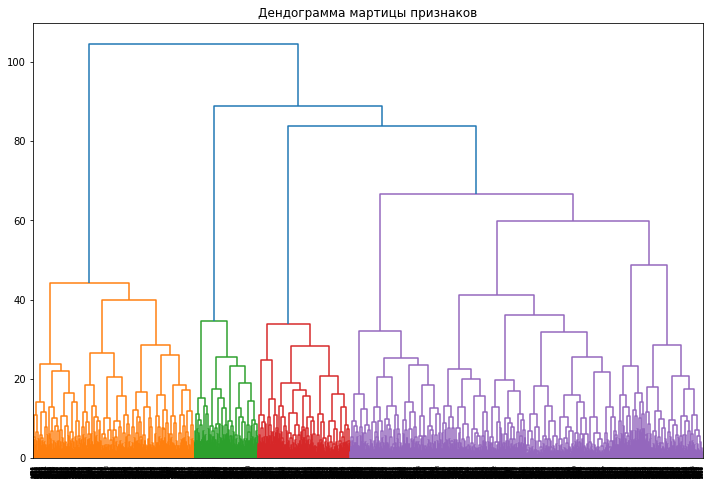

In [31]:
# строим матрицу расстояний
linked = linkage(X_sc, method='ward')
# рисуем дендрограмму
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top')
plt.title('Дендограмма мартицы признаков')
plt.show()

Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике.

### Обучение модели кластеризации на основании алгоритма K-Means и прогнозирование кластеров клиентов

In [32]:
# обучим модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0)
# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(X_sc)
labels

array([1, 0, 3, ..., 0, 0, 1], dtype=int32)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, 5 кластеров нам подходит</div>

In [33]:
df['cluster_km'] = labels
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227,5,3,0.020,0.000,0,1
1,0,1,0,0,1,12,1,31,113.203,12,7,1.923,1.910,0,0
2,0,1,1,0,1,1,0,28,129.448,1,2,1.859,1.737,0,3
3,0,1,1,1,1,12,1,33,62.670,12,2,3.206,3.357,0,0
4,1,1,1,1,1,1,0,26,198.362,1,3,1.114,1.120,0,3


Прогноз кластеров добавлен в таблицу в новый столбец `cluster_km`.

### Средние значения признаков для кластеров

In [34]:
# выводим статистику по средним значениям наших признаков по кластеру
df.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.503,0.522,0.495,0.486,0.560
near_location,0.959,0.862,0.000,1.000,0.976
partner,0.783,0.470,0.463,0.350,0.357
promo_friends,0.574,0.306,0.079,0.240,0.230
phone,1.000,0.000,1.000,1.000,0.999
contract_period,10.889,4.787,2.352,1.948,2.669
group_visits,0.543,0.426,0.216,0.342,0.474
age,29.982,29.301,28.477,28.168,30.125
avg_additional_charges_total,160.761,143.958,135.458,131.622,161.658
month_to_end_contract,9.954,4.475,2.198,1.857,2.459


Кластеры 2 и 3 более склонны к оттоку, чем остальные. Для них характерны:
- длительность текущего действующего абонемента (`contract_period`) менее 2.5-х месяцев;
- меньшее вовлечение в групповые занятия (`group_visits`);
- меньшие траты на другие услуги фитнес-центра: кафе, спорттовары, косметический и массажный салон `avg_additional_charges_total` (меньше 140);
- посещение клуба менее 2-х раз в неделю (за все время `avg_class_frequency_total`, и за последний месяц `avg_class_frequency_current_month`).

Наиболее надежные клиенты кластеров 0 и 4. Им характерны:
- время с момента первого обращения в фитнес-центр (в месяцах) `lifetime` более 4-х месяцев;
- средняя частота посещений в неделю за все время с начала действия абонемента или за предыдущий месяц `avg_class_frequency_total`/`avg_class_frequency_current_month` - 2 и более раз;
-  суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон(`avg_additional_charges_total`) - более высокая по сравнению с други классами (более 160).

Также положительно на удержании клиентов сказываются:
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга»;
- `Partner` — сотрудничество компании клиента с клубом.
Не оказывают влияния на отток:
- Пол;
- Наличие телефона.

<div class="alert alert-block alert-info"><b>Вопрос ревьюеру:</b><br>
Подскажи, пожалуйста:<br>
1) После отработки функции, графики выводятся в окне с полосой прокрутки - это не очень удобно. Можно ли как-то увеличить размер окна? И как выводить вообще без окна с прокруткой (полной простыней)? https://disk.yandex.ru/i/aQ2hVixyq-EnCw <br><br>
2) Ниже использую 2 способа вывода графиков с распределениями. Какой способ предпочтительнее? Или может нужно было вообще иным способом? Как оптимально было бы?   
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 
1. Если я правильно тебя понял, то это сам jupyter сворачивает графики для более удобного чтения всей тетрадки, но если тебе нужно посмотреть на них подробнее, то можно кликнуть сюда, и ячейка с графиками развернется:
    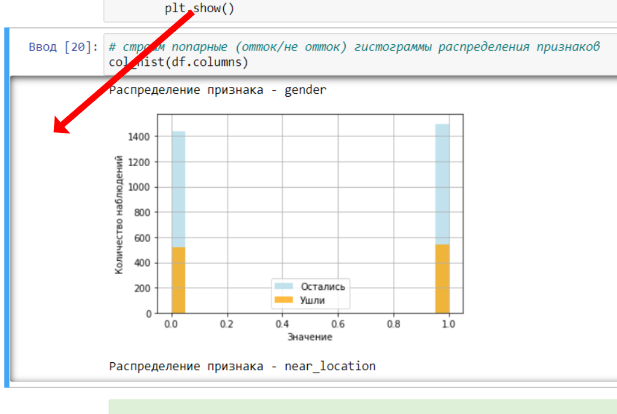
    
А двойной клик полностью скроет отображение.
    
2. Тут однозначного ответа нет, как тебе больше нравится :) Конкретно мне нравится второй вариант, когда графики пересекаются, мне он кажется более наглядным. Разве что я бы немного поменял цветовую гамму на более контрастную и добавил параметр kde=True при вызове sns.displot, чтобы отрисовать еще оценку плотности. Но единого решения все таки нет, поэтому выбирать тебе.
</div>

### Распределение признаков для кластеров

<div class="alert alert-block alert-info"><b>Вопрос ревьюеру:</b><br>
1) Добавила `kde=True` при вызове sns.displot, но появилось предупреждение - <cite> warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate."</cite> <br>
Это критично? Как избавиться от предупреждения? <br><br>


2) Пробовала изменить цвет графика на более контрастный с помощью sns.color_palette("husl", 5) - не получилось. Подскажи, пожалуйста, как нужно правильно?
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 
1) Предупреждение не критично, оно говорит, что в этом признаке нет достаточного количества уникальных значений. Например, для признака `phone` во всех кластерах, кроме 4, только одно уникальное значение, оценку плотности на таких данных не построить. Можно написать функцию, которая будет возвращать True или False в зависимости от количества значений и передавать ее результат в kde. Либо можно сделать по старинке и просто скрыть все предупреждения:
    
    import warnings
    warnings.filterwarnings("ignore")
    
Но это на свой страх и риск, можно пропустить какие-то полезные предупреждения. Еще можно вызвать конкретно эту функцию со скрытием предупреждений, вот <a href="https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings" target="blank_">пример</a> в документации python
    
2) Метод sns.color_palette возвращает палитру, можно ее передать в параметр palette при отрисовке графика. А для настройки палитры для всех графиков можно использовать метод sns.set_palette
</div>

Распределение признака gender по кластерам


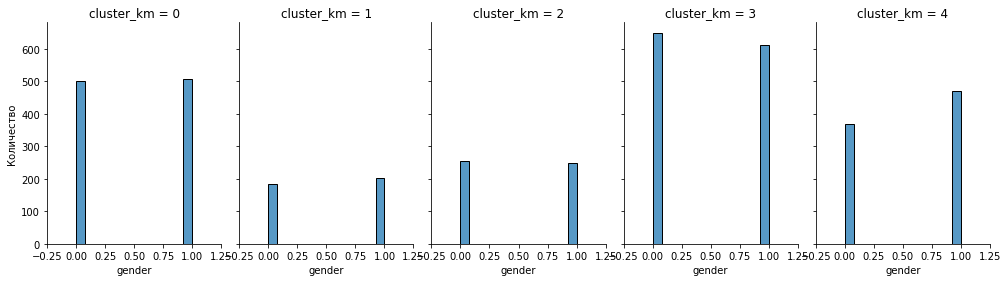

Распределение признака near_location по кластерам


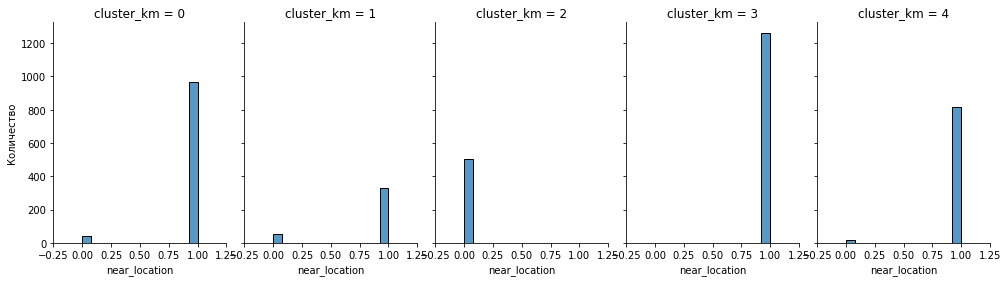

Распределение признака partner по кластерам


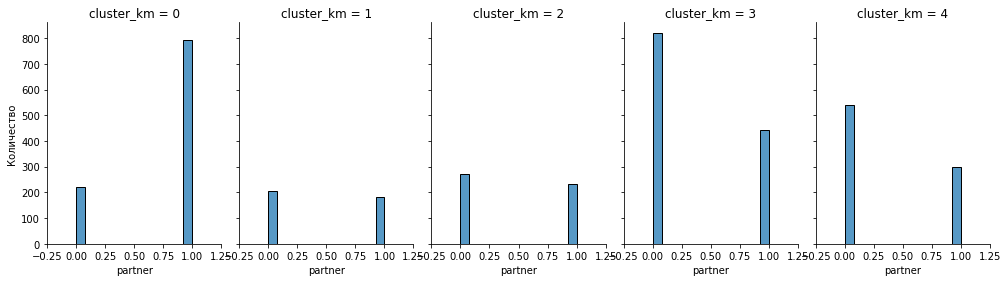

Распределение признака promo_friends по кластерам


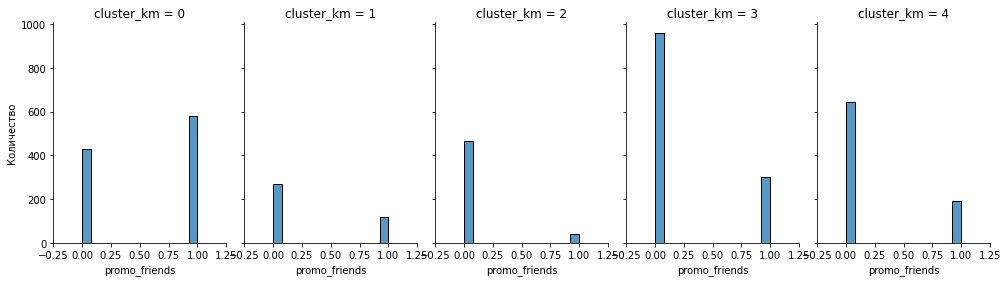

Распределение признака phone по кластерам


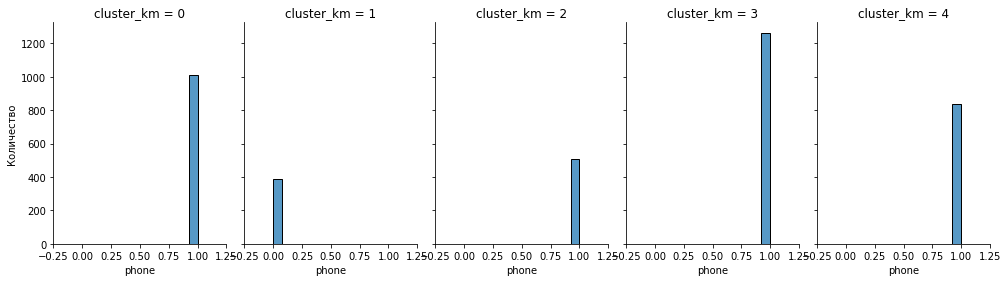

Распределение признака contract_period по кластерам


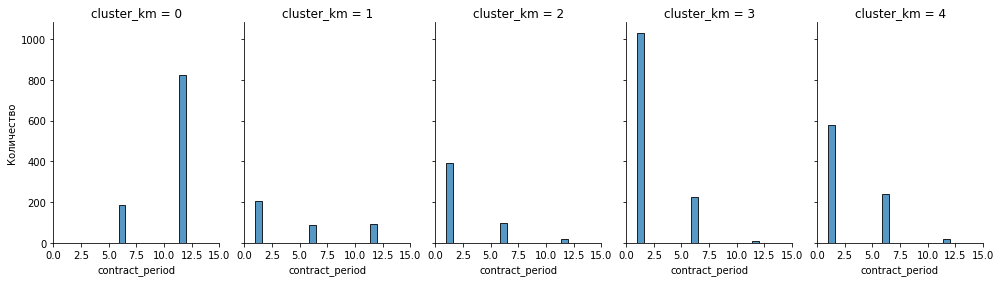

Распределение признака group_visits по кластерам


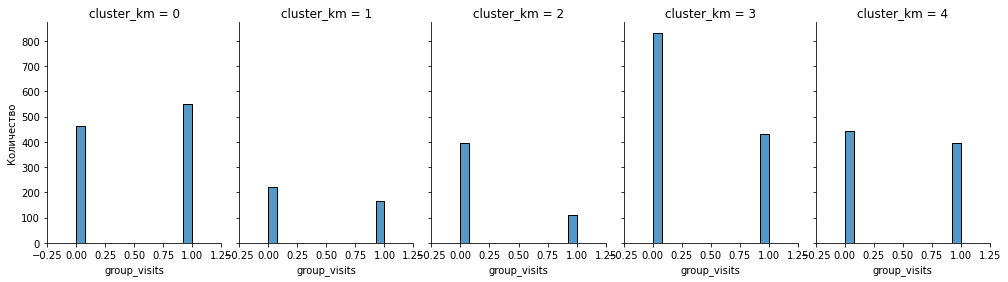

Распределение признака age по кластерам


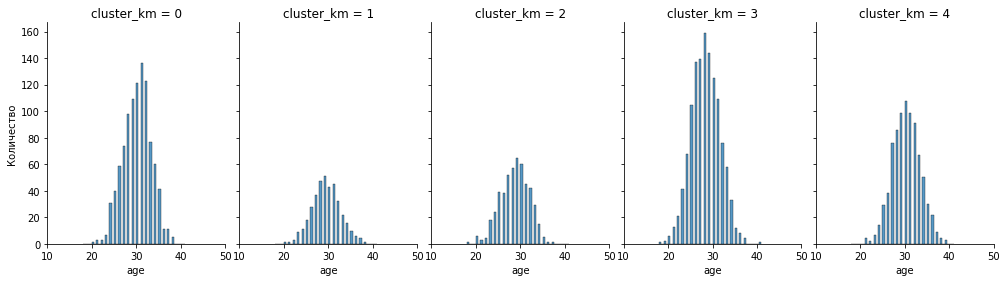

Распределение признака avg_additional_charges_total по кластерам


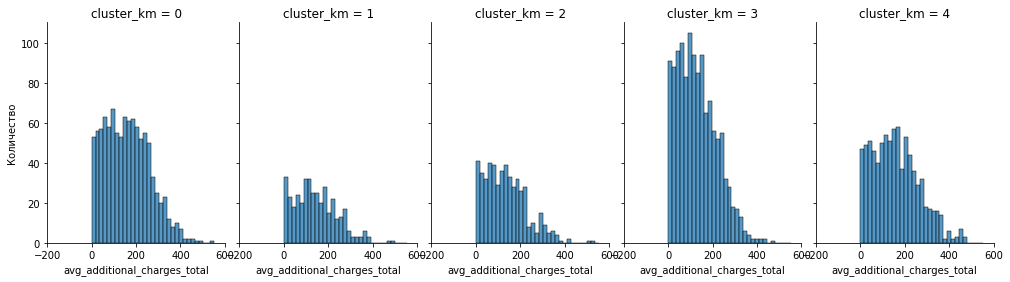

Распределение признака month_to_end_contract по кластерам


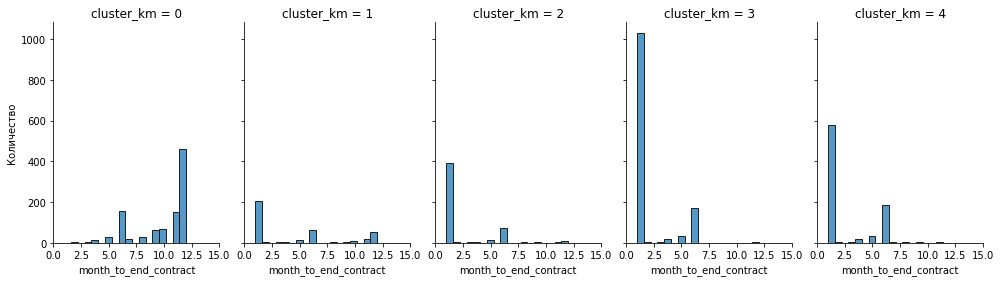

Распределение признака lifetime по кластерам


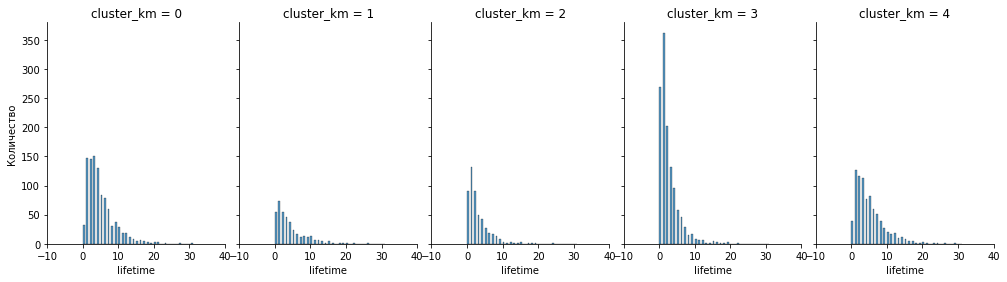

Распределение признака avg_class_frequency_total по кластерам


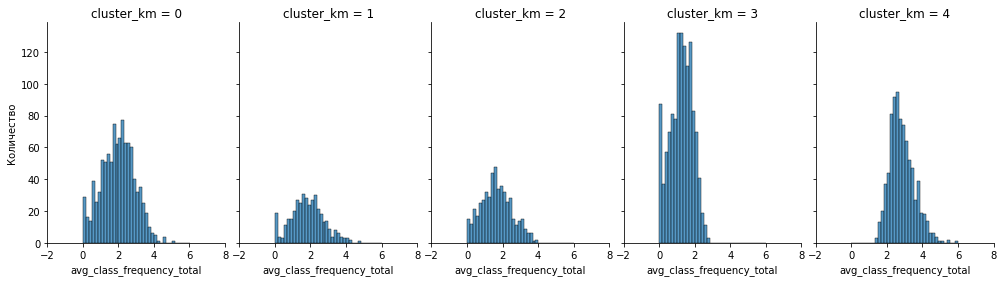

Распределение признака avg_class_frequency_current_month по кластерам


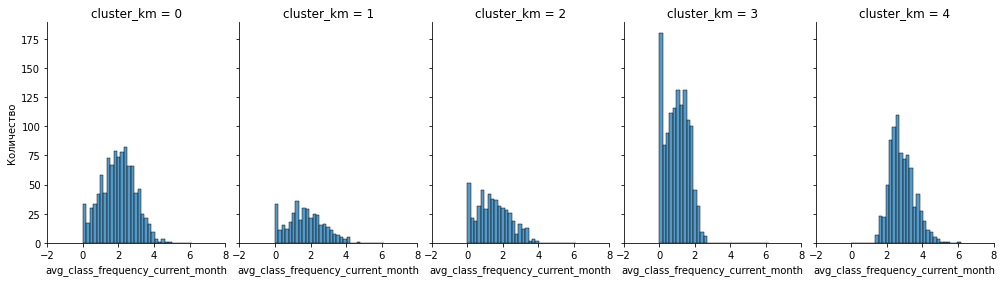

In [35]:
# функция для построения графиков распределения признаков по кластерам
def get_hist(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = df[key_cols]
    for c in key_cols[:-2]:
        print('Распределение признака {} по кластерам'.format(c))
        ax = sns.displot(data=x_new, x=x_new[c], col='cluster_km', height=4, aspect=0.7)
        ax.set_xlabels(c, size=10)
        ax.set_ylabels('Количество', size=10)
        ax.set_xticklabels(size=10)
        ax.set_titles(size=12)
        plt.show()

get_hist(df, 'cluster_km', df.columns)


#sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="sex", kind="kde")

Распределение признака gender по кластерам


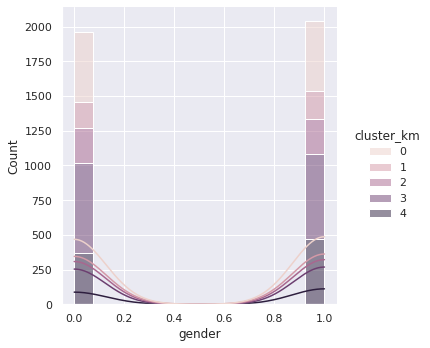

Распределение признака near_location по кластерам


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


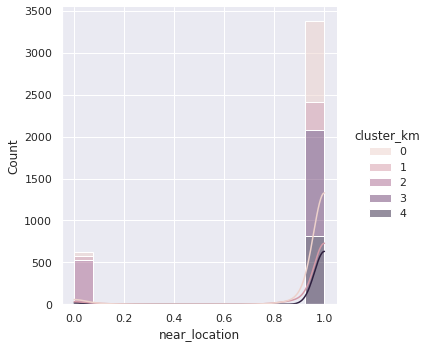

Распределение признака partner по кластерам


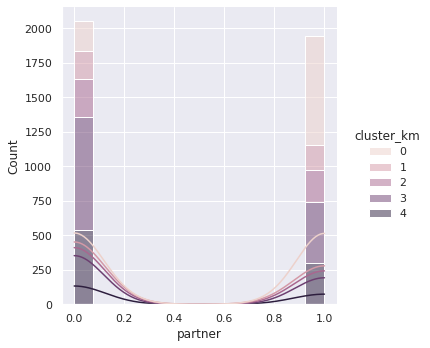

Распределение признака promo_friends по кластерам


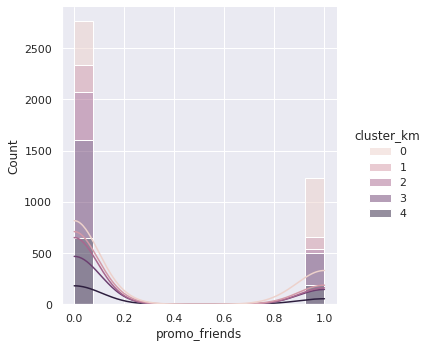

Распределение признака phone по кластерам


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


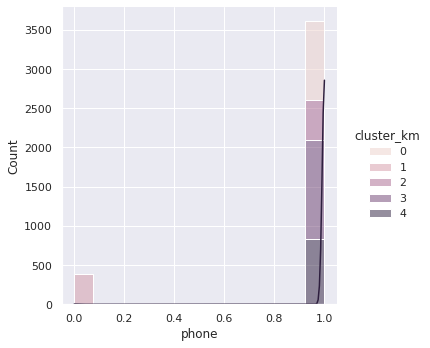

Распределение признака contract_period по кластерам


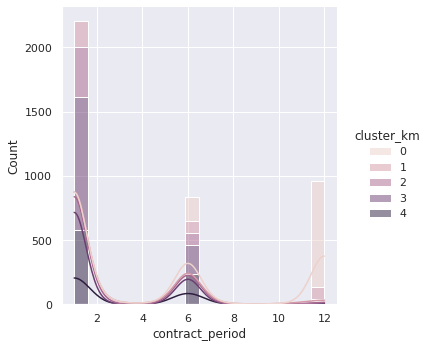

Распределение признака group_visits по кластерам


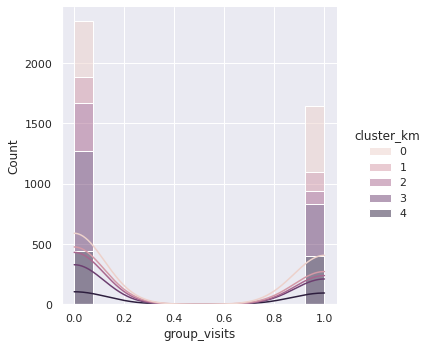

Распределение признака age по кластерам


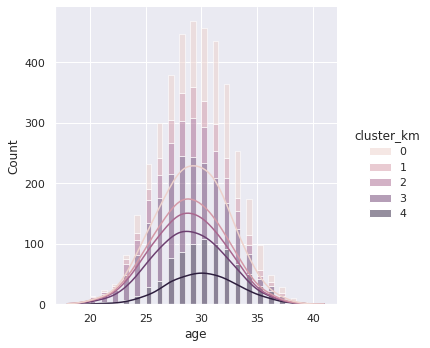

Распределение признака avg_additional_charges_total по кластерам


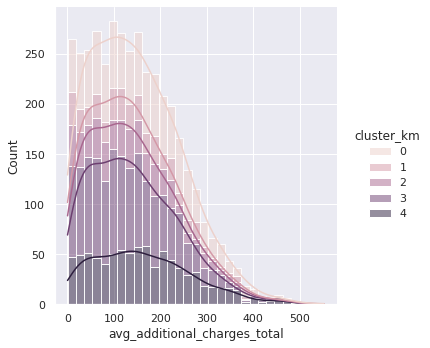

Распределение признака month_to_end_contract по кластерам


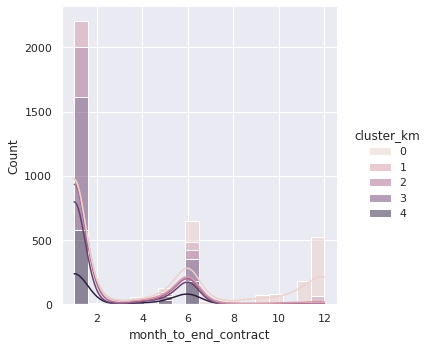

Распределение признака lifetime по кластерам


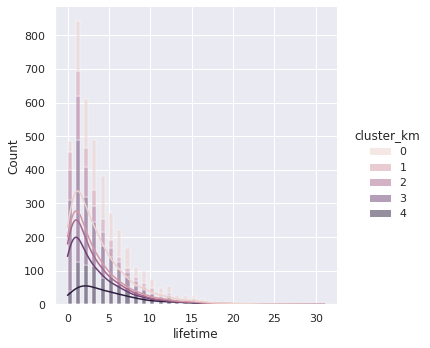

Распределение признака avg_class_frequency_total по кластерам


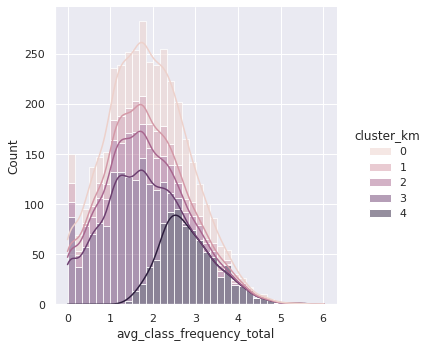

Распределение признака avg_class_frequency_current_month по кластерам


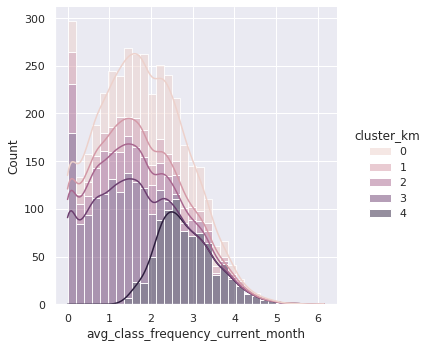

In [59]:

# функция для построения графиков распределения признаков по кластерам с накоплением
def get_hist(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = df[key_cols]
    for c in key_cols[:-2]:
        #for cl in x[group_col].unique():
        print('Распределение признака {} по кластерам'.format(c))
        #sns.color_palette("husl", 5)
        #plt.figure(figsize=(10, 4))
        #sns.set_palette('colorblind')
        sns.set_style('whitegrid') 
        sns.set(rc={'figure.figsize':(14, 6)})
        #rcParams['figure.figsize'] = 14, 6
        #ax=sns.displot(data=x_new, x=x_new[c], hue='cluster_km', multiple='stack', kde=True, palette="colorblind")
        ax=sns.displot(data=x_new, x=x_new[c], hue='cluster_km', multiple='stack', kde=True,
                    #label='{} = {}'.format(group_col, str(cl)), bins = 10
                    )
        
        plt.show();

get_hist(df, 'cluster_km', df.columns)

#sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

Большинство клиентов живет рядом с фитнес-клубом. 
Партнерство с компанией клиента скорее важно.
Мало клиентов приходит по промокоду друга, хотя такая акция имеет положительное влияние на верность клубу.

Более надежны клиенты:
- покупают абонементр на 6-12 месяцев;
- посещают групповые занятия;
- более старшего возраста - старше 29;
Не важны:
- пол,
- телефон.

Отдельно стоит отметить:
- многие клиенты из подверженного оттоку кластера 3, пользуются другими услугами фитнес-центра, возможно повышение качества данных услуг или бонусы на дополнительные услуги, могли бы стимулировать этих клиентов оставаться с клубом дольше;
- через полгода количество клиентов из всех кластеров стремительно идет на убыль (даже для самых надежных);
- клиенты из кластера 4 отличаются повышенной спортивностью, посещают клуб 2 и более раз в неделю, чаще покупают абонементы на 1 месяц, но в целом, их активность длится около 3-х месяцев и далее идет на спад. Хорошо бы мотивировать таких клиентов оставаться в клубе какими-то особыми подходами.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все верно!</div>

### Доля оттока для полученных кластеров

Для каждого полученного кластера посчитаем долю оттока.

In [37]:
# df.groupby('cluster_km')['churn'].mean()

print('Доля оттока для каждого кластера')
table = (
    df.groupby('cluster_km', as_index=False) # убрать индекс - вместо reset_index()
    .agg({'churn': ['count', 'sum', 'mean']})
)
# table
table.columns = ['Кластер', 'Всего_клиентов', 'Ушедших_клиентов', 'Доля_ушедших_клиентов']
display(table.style.format({'Доля_ушедших_клиентов':'{0:.0%}'}))

Доля оттока для каждого кластера


,Кластер,Всего_клиентов,Ушедших_клиентов,Доля_ушедших_клиентов
0,0,1010,28,3%
1,1,385,103,27%
2,2,505,224,44%
3,3,1262,649,51%
4,4,838,57,7%


Кластеры отличаются по доле оттока. Кластеры 2 и 3 более склонны к оттоку, а кластер 0 — самый надёжный.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

### Выводы и рекомендации по работе с клиентами

Выводы:
- В результате исследования сформирована и обучена модель прогнозировния вероятности оттока (на уровне следующего месяца) для каждого клиента на базе алгоритма LogisticRegression;<br><br>
- Проанализированы 2 группы - ушедшие и оставшиеся.<br> 
    Ушедшим клиентам характерны:
    - более удаленное проживание;
    - отсутствие промокодов от друзей;
    - абонементы сроком 1 месяц (соответственно срок до окончания абонемента - 1 месяц), лайфтайм также составляет в основном около 1 месяца;
    - меньшая вовлеченность в групповые занятия;
    - более молодой возраст (моложе 29);
    - меньшие траты на дополнительный услуги фитнес-центра,
    - частота посещений - менее 2-х раз в неделю.<br><br>
    Оставшимся клиентам характерны:
    - живут близко;
    - работают в компаниях-партнерах клуба;
    - преобретают абонементы на длительный период -  1 год или 6 месяцев;
    - активнее участвуют в групповых зянтиях;
    - старше 30 лет;
    - лайфтайм около полугода;
    - посещают фитнес-центр 2 и более раз в неделю.

    Пол и наличие телефона не влияет на отток.<br><br>

- Наиболее сильно влияют на отток:
    - период абонемента - чем больше срок абонемента, тем надежнее клиент, клиенты с абонементом, окончание которого заканчивается через месяц, скорее всего покинут фитнес-центр;
    - частота посещения менее 2-х раз в неделю;
    - промокоды от друзей;
    - партнерство с компанией клиента.


Рекомендации по стратегии взаимодействия с клиентами и их удержанию:<br><br>
Можно выделить 5 кластеров клиентов, из которых 2 наиболее склонны к оттоку, 2 наиболее надежны и 1 промежуточный.<br>
Для работы с группами, склонными к оттоку (кластеры 2 и 3), рекомендуется:
- расширять сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент, особенно для тех компаний, которые расположены в непосредственной близости от финтес-центров;
- расширять программу акции «приведи друга» (промо-код от знакомого на оплату первого абонемента или аналогичные);
- стимулировать покупать абонементы на срок более 1 месяца, например, за счет особых скидок на длительные абонементы или ввести новый срок абонемента, например, на 3 месяца;
- активнее приглашать, вовлекать, рекламировать групповые занятия, развивать направление групповых занятий.

Среди наиболее надежных групп клиентов, следует выделить кластер 4. В основном это те, кто живет или работае рядом в фитнес-центром. Их особенность - наиболее частое посежение финтеса - более 2-х раз в неделю. Они занимаются активно, но не очень продолжительно во времени - большинство посещает фитнес-центр около 3 месяцев, а после 6 месяцев - их количество стремительно падает. Рекомендуется:
- стимулировать интерес и активность таких клиентов после 3-х месяцев занятий (например, за бонусов на дополнительные услуги центра, предлагать услуги сопровождения тренером и подобные);
- удерживать клиентов данной группы, за счет комфортных для них условий по продлению абонемента, стимулировать преобретать абонементы на срок 12 месяцев;
- предлагать промокоды для друга или подобные, чтобы друг мог вдохнуть новое желание продолжать ходить в центр "за компанию".


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: да, такие рекомендации бизнесу точно пригодятся</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Уф, классный проект, спасибо!
    
Шикарные графики, грамотная работа с моделями, подробный анализ, полезные рекомендации, все супер!

Критичных замечаний нет, остальные комментарии можно найти в проекте.

**Я готов принять твой проект в этом виде, если ты просто отправишь его обратно**. Но если есть желание его доработать, с удовольствием посмотрю его еще раз :)
    
Готов ответить на любые вопросы!

<b>Удачи!</b>
        
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Алексей, еще раз спасибо! <br>
    Буду очень рада, если сможешь поделиться ссылками на доп материалы по темам а) парсинга и б) графиков (есть пробелы) или любым темам, которые близки тебе (для общего развития). Хороших выходных!
    
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

Стало еще лучше, круто!
    
По поводу ссылок:
а) про парсинг есть куча хороших статей, вот пара примеров:
* https://pythonru.com/biblioteki/parsing-na-python-s-beautiful-soup
* https://proglib.io/p/parsing-course
    
Но ими можно не ограничиваться, в принципе, подойдут любые по запросам «парсинг питон», «python parsing», там особых секретов нет, поэтому они все более-менее дублируют друг друга, просто приводя разные примеры.
    
б) с графиками сложнее, тут возникает вопрос — а что хочется узнать? Если речь идет о конкретных методах и отдельных кейсах, то пытаться что-то читать и запоминать бесполезно, это все равно что пытаться выучить все методы в pandas, тут лучше научиться гуглить и желательно на английском языке. Если же речь идет о более общей информации о визуализации, можно попробовать посмотреть какую-нибудь обзорную лекцию(<a href="https://www.youtube.com/watch?v=uUchPKmxfQ0&ab_channel=VKTeam" target="blank_">пример</a>), по которой можно будет определить свои пробелы, а дальше уже гуглить их :)
    
А если хочется закрепить тему машинного обучения, то можно посмотреть три лучших бесплатных курса на эту тему:
* https://ods.ai/tracks/open-ml-course
* https://stepik.org/course/4852/promo
* https://www.kaggle.com/learn

Выбирать можно любой или все сразу — они все хороши :)
    
Ну а теперь я могу принять твой проект.

<b>Успехов в обучении!</b>
        
</div>